In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize=(15,10));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        plt.imshow(img[:,:,::-1]);
        # plt.imshow(img);
    plt.show()

In [30]:
img = cv2.imread("Test/test_images/solidWhiteRight.jpg")
img = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)


In [31]:
points = np.array([[
    [100, 550],
    [930, 550],
    [510, 315],
    [440, 315],
]])


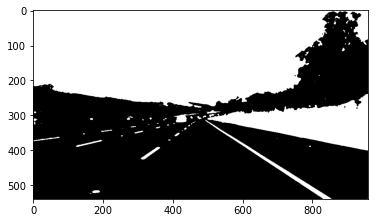

In [33]:
# blur = cv2.medianBlur(gray_img,21)
blur = cv2.GaussianBlur(gray_img, (9, 9), 1)
_,thresh = cv2.threshold(blur,128,255,cv2.THRESH_BINARY)

imshow(thresh, False, False)

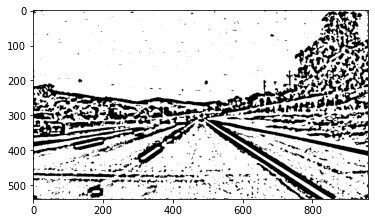

In [34]:
thr = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)
imshow(thr, False, False)

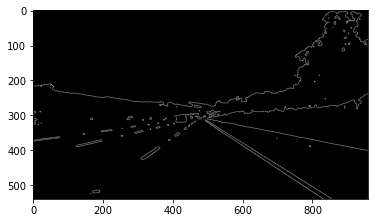

In [37]:
edges = cv2.Canny(thresh, 1, 255, apertureSize=3)
imshow(edges, False, False)


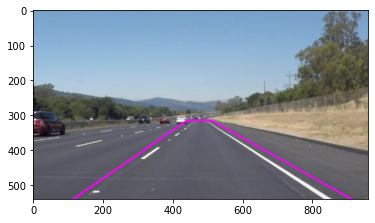

In [39]:
img_copy = img.copy()
img_copy = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

color = (255, 0, 255)
cv2.polylines(img_copy, points, True, color, 4)
imshow(img_copy, False)

In [8]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 80)
# lines[0][0]


array([210.       ,   1.7627826], dtype=float32)

In [40]:
# for line in lines:
    # cv2.line(img,int(line[0][0]),int(line[0][1]) ,(0,255,0),5)


In [84]:
for line in lines:
    for r, theta in line:
        # Stores the value of cos(theta) in a
        a = np.cos(theta)

        # Stores the value of sin(theta) in b
        b = np.sin(theta)

        # x0 stores the value rcos(theta)
        x0 = a * r

        # y0 stores the value rsin(theta)
        y0 = b * r

        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 1000 * (-b))

        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 1000 * (a))

        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 1000 * (-b))

        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 1000 * (a))

        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the colour of the line to be
        # drawn. In this case, it is red.
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

In [85]:
cv2.imshow("Image Name", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1